# Spotify Song Popularity Analysis 
### Team members: Mohammad Sakir, Erin Thomas,  Noor Sadia
In this project, we will be using predictive analysis to predict the popularity of a song based on its list of features from a spotify dataset. In order to achieve this goal, we will be analyzing different spotify audio features of songs and running and evaluating different models to find the most appropriate one suited for our prediction.

## Outline
- [Importing Packages and Libraries](#Importing-Packages-and-Libraries)
- [Loading and Investigating the Raw Data](#Loading-and-Investigating-the-Raw-Data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Models and Prediction](#Models-and-Prediction)

## Importing Packages and Libraries

In [238]:
import numpy as np
import pandas as pd
import seaborn as sns 

from matplotlib import pyplot as plt 
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

# !pip install lightgbm --> uncomment this line to install lightgbm
import lightgbm as lgb

import warnings 
warnings.filterwarnings("ignore")

## Loading and Investigating the Raw Data

In [239]:
df = pd.read_csv("data.csv")
print(df.columns)

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


In [240]:
print(df.size)

3228271


In [241]:
df.sample(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
131817,0.000034,['AC/DC'],0.441,193600,0.907,0,0oIox8T3bdGZnhQKnaDK2a,0.143000,2,0.0880,-4.427,1,Flick of the Switch,42,1983-08-15,0.0390,129.489,0.6990,1983
56490,0.966000,"['Jack Cassidy', 'Laurel Shelby', 'On Your Toe...",0.433,207667,0.189,0,2JEo7UBDgBBRZw3PDe6CXw,0.000002,2,0.1210,-15.908,1,Finale,0,1953,0.0330,80.894,0.4150,1953
7549,0.000848,['Troye Sivan'],0.567,224874,0.593,0,4z8Ll8nU1jMqB8HvKTyLP1,0.000002,4,0.1140,-7.127,0,Happy Little Pill,58,2014-08-15,0.0375,91.703,0.0398,2014
99802,0.992000,"['Arun Kumar', 'Renu']",0.325,205933,0.239,0,05P7xBA9XrULmFKltUb95W,0.467000,6,0.1580,-13.163,0,Sarson Peeli,0,1945-12-01,0.0886,74.560,0.2410,1945
74173,0.076000,['CHIC'],0.783,412640,0.737,0,7yi6ExUutNRVa8KPgIiprd,0.017300,9,0.0330,-5.002,1,I Feel Your Love Comin' On,31,1982-11-01,0.0597,117.296,0.8110,1982
115626,0.125000,['Kolohe Kai'],0.911,211147,0.722,0,6uJaTP7EbaHXJ5PM09s0uV,0.000000,10,0.0922,-3.967,1,Cool Down,57,2009-09-25,0.0389,140.032,0.8610,2009
147518,0.598000,['The Monkees'],0.513,127093,0.505,0,5V75TzQOtCAsPo2Dl6EpPJ,0.000000,9,0.1200,-10.064,1,This Just Doesn't Seem to Be My Day - Original...,23,1966-10-10,0.0355,112.235,0.6770,1966
44382,0.079100,['David Bowie'],0.772,225000,0.450,0,3XxXYVff48kJx5e8XwerSp,0.006350,9,0.0699,-8.369,1,Tonight - 2018 Remaster,40,1984-09-29,0.0265,98.472,0.7930,1984
56961,0.653000,['LaVern Baker'],0.686,141947,0.302,0,1eBpfwZ41yegAxhTJ33gNw,0.000013,1,0.0809,-10.488,1,"Get Up, Get Up (You Sleepy Head)",11,1957,0.0793,145.231,0.7720,1957
119208,0.995000,['Roza Eskenazi'],0.490,198467,0.283,0,04ejW3Ullue16DcOitBwQY,0.000312,7,0.3450,-11.717,1,Mpolsevika,0,1950-01-01,0.0454,144.518,0.8400,1950


### <b>Data Description</b>
    
Following are all the features of our dataset put together based on the Spotify Web API:
    

<b>acousticness:</b> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
    
<b>artists:</b> The name(s) of the artist(s) who perform the track.
    
<b>danceability:</b> Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
    
<b>duration_ms:</b> A track's duration in milliseconds.
    
<b>energy:</b> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
    
<b>explicit:</b> Whether the track was labeled as "explicit" due to content. 1 = Yes, 0 = No.
    
<b>id:</b> Track's unique identifier.
    
<b>instrumentalness:</b> Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
    
<b>key:</b> The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
    
<b>liveness:</b> Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
    
<b>loudness:</b> The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. NOTE: Loudness is measured negatively here on purpose. This is because we are dealing with digital sound that a computer can listen to which is measured differently than what the human ear can listen to. 
    
<b>mode:</b> Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
    
<b>name:</b> Name of Track
    
<b>popularity:</b> The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
    
<b>release_date:</b> Date of track's release.
    
<b>speechiness:</b> Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
<b>tempo:</b> The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
    
<b>valence:</b> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
<b>year:</b> Year of track's release.
    
Data info taken from: [https://github.com/calebelgut/spotify-lstm](https://github.com/calebelgut/spotify-lstm) 

Before getting started, let's get to know our dataset and clean it as we go along.

In [242]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [243]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [244]:
df.shape

(169909, 19)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

Removing the track id of the songs because we will not be needing this for our analysis or evaluation.

In [246]:
df.drop(['id'], axis=1, inplace=True)

Changing the popularity and duration type as float to allow easy data processing.

In [247]:
df['popularity'] = df['popularity'].astype(float)
df['duration_ms'] = df['duration_ms'].astype(float)

Separating the continuous and categorical features for ease in future analysis.

In [248]:
continuous_columns = [col for col in df.columns if df[col].dtype == float or df[col].dtype == int]
categorical_columns = [col for col in df.columns if df[col].dtype == object]

In [249]:
print("Continuous Columns -> ",continuous_columns)
print("Categorical Columns -> ",categorical_columns)

Continuous Columns ->  ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence']
Categorical Columns ->  ['artists', 'name', 'release_date']


In the categorical columns, **artists** are in a list format, which we will represent in a better format during the exploratory analysis, and **name** is not of much importance. The only categorical variable left is **release_date** that needs to be made into a uniform format.

In [250]:
df.sample(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
163179,0.988,"['Frédéric Chopin', 'Eugene Ormandy', 'Philade...",0.291,441907.0,0.1700,0,0.9300,6,0.1400,-18.452,0,Fantasy on Polish Airs for Piano and Orchestra...,1.0,1953,0.0356,68.071,0.157,1953
98949,0.315,['The 1937 Flood'],0.253,283307.0,0.3620,0,0.0393,7,0.5510,-12.360,1,Ramblin' Boy (Live),0.0,1937,0.0309,159.340,0.511,1937
51409,0.880,['Nina Simone'],0.345,172800.0,0.0757,0,0.0298,5,0.0973,-20.606,1,That's All I Want From You,29.0,1978,0.0358,88.755,0.142,1978


### Making the release_date variable consistent 
Let's start by exploring the release_date feature.
When observing the data in this column, we noticed that this column was populated in different formats. A majority of the rows showed the release date in the year-month-day format. However, many rows also represented this in years only.

In [251]:
df['release_date']

0               1928
1               1928
2               1928
3         1928-09-25
4               1928
             ...    
169904    2020-05-15
169905    2020-06-08
169906    2020-05-29
169907    2020-02-28
169908    2020-03-27
Name: release_date, Length: 169909, dtype: object

In [252]:
count = 0
for ind, dt in df['release_date'].items():
    if len(dt) == 4:
        count += 1
count

50382

As noted by the output above, we see that over 50,000 of the release_date values show years only. We have to make the data in a consistent format. Since deleting all these rows will reduce our data size by a significant number, we decided to replace the years with a default day and month (-01-01).

In [253]:
def date_dummy(txt):
    dummy = "-01-01"
    return txt+dummy

In [254]:
df['release_date'] = df['release_date'].apply(lambda x: date_dummy(x) if len(x) == 4 else x)

In [255]:
# Updated release_date
df['release_date']

0         1928-01-01
1         1928-01-01
2         1928-01-01
3         1928-09-25
4         1928-01-01
             ...    
169904    2020-05-15
169905    2020-06-08
169906    2020-05-29
169907    2020-02-28
169908    2020-03-27
Name: release_date, Length: 169909, dtype: object

In [256]:
df_numeric = df.drop(columns=categorical_columns)

## Exploratory Data Analysis

Let us have a look at the datatypes of the all the variables of the data again

In [257]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms         float64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity          float64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

We see 3 ategories:
- **int64 category**: key, mode, explicit and year
- **float64 category**: popularity, tempo, acousticness, instrumentalness, speechiness, valence, danceability, energy,   liveness, loudness, duration_ms
- **object/catgorical variables**: artists, name, release_date

Through this analysis, we will be:
- [check the data density balance across the features of integer type](#Checking-the-data-density-balance-across-the-features-of-integer-type)
- [producing and analyzing distributions for the rest of the continuous variables of floating type](#Distributions-for-the-rest-of-the-continuous-variables)
- [exploring the relevent categorical variable: artists](#Artists)
- [observe feature trends with respect to time](#Feature-Trends-with-Time)
- [observe feature trends with respect to popularity](#Feature-Trends-with-Popularity)

### Checking the data distribution across the features of integer type
Let's explore the balance of the spotify features of the songs.

### Key
Exploring the key feature.

In [258]:
df2 = df.groupby('key', as_index=False).size().sort_values(by='size',ascending=True)
df2

,key,size
3,3,7185
6,6,8586
11,11,10593
8,8,10711
10,10,12056
1,1,12816
4,4,12921
5,5,16336
9,9,17628
2,2,18821


Transforming the information above into a visual representation using a barplot.

Text(0.5, 1.0, 'Number of songs per key')

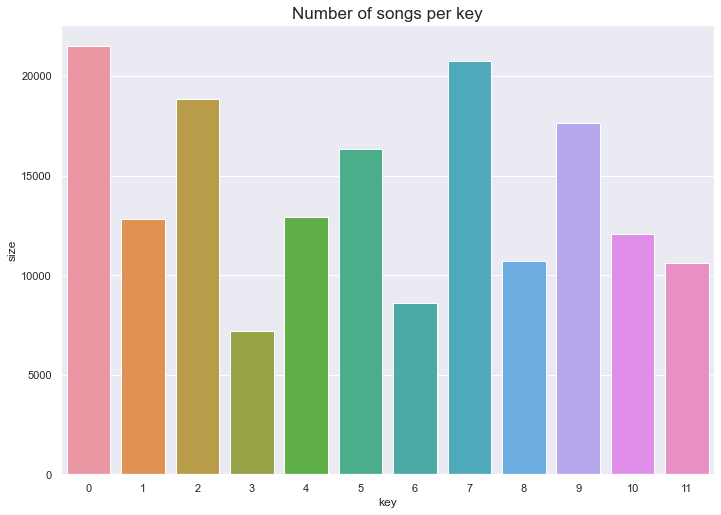

In [259]:
sns.barplot(x='key', y='size', data=df2).set_title("Number of songs per key", fontsize=17)

We see a fluctuation across the different keys and the number of songs produced, with no certain pattern in the key number and the number of songs produced. However, the highest number of songs produced have a key of 0, while the least number of songs are in key 4.

### Mode
Exploring the mode feature.

In [260]:
df3 = df.groupby('mode', as_index=False).size().sort_values(by='size',ascending=True)
df3

,mode,size
0,0,49519
1,1,120390


Transforming the information above into a visual representation using a barplot.

Text(0.5, 1.0, 'Number of songs per mode')

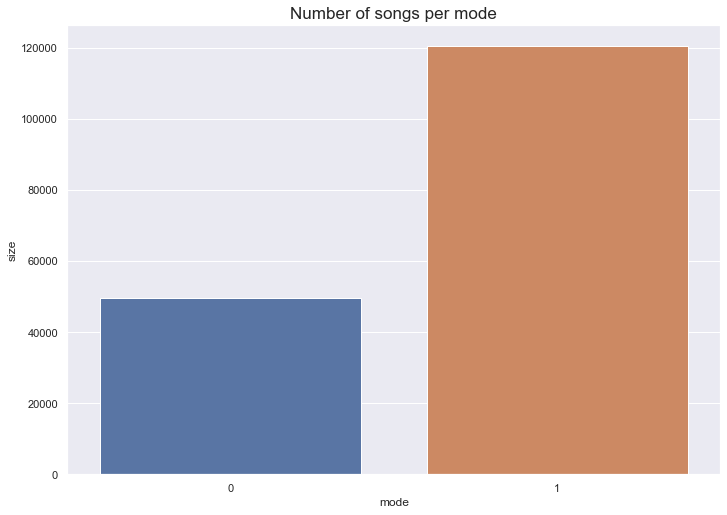

In [261]:
sns.barplot(x='mode', y='size', data=df3).set_title("Number of songs per mode", fontsize=17)

A significant majority of the tracks are produced in the major modality while a fewer number of songs belong to the minor modality.

### Explicit
Exploring the explicit feature.

In [262]:
df4 = df.groupby('explicit', as_index=False).size().sort_values(by='size',ascending=True)
df4

,explicit,size
1,1,14419
0,0,155490


Transforming the information above into a visual representation using a barplot.

Text(0.5, 1.0, 'Number of songs per explict rate')

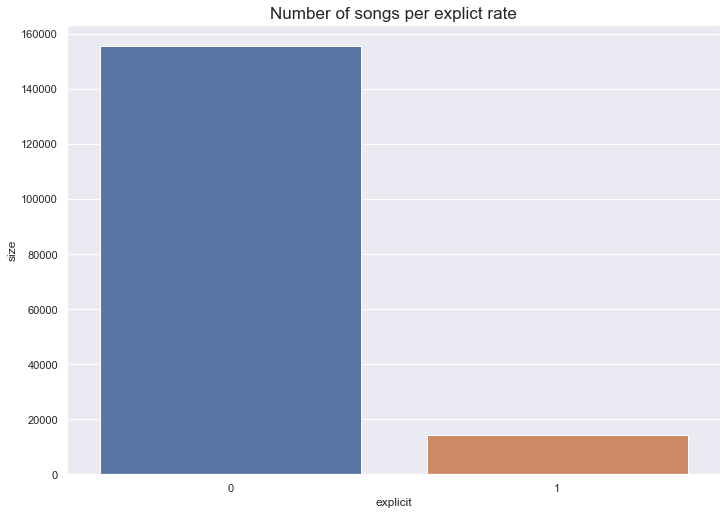

In [263]:
sns.barplot(x='explicit', y='size', data=df4).set_title("Number of songs per explict rate", fontsize=17)

A significantly larger number of were not labelled as explicit, as opposed to the number of songs that were labelled as explicit

### Year
Let's start by exploring the year feature.

In [264]:
print(df['year'].min())
print(df['year'].max())
df['year'].unique()

1921
2020


array([1928, 1930, 1935, 1936, 1940, 1942, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1929, 1931, 1932, 1933, 1934, 1937, 1938, 1939, 1941, 1943,
       1944], dtype=int64)

In [265]:
df1 = df.groupby('year', as_index=False).size().sort_values(by='size',ascending=True)

Text(0.5, 1.0, 'Number of songs per Year')

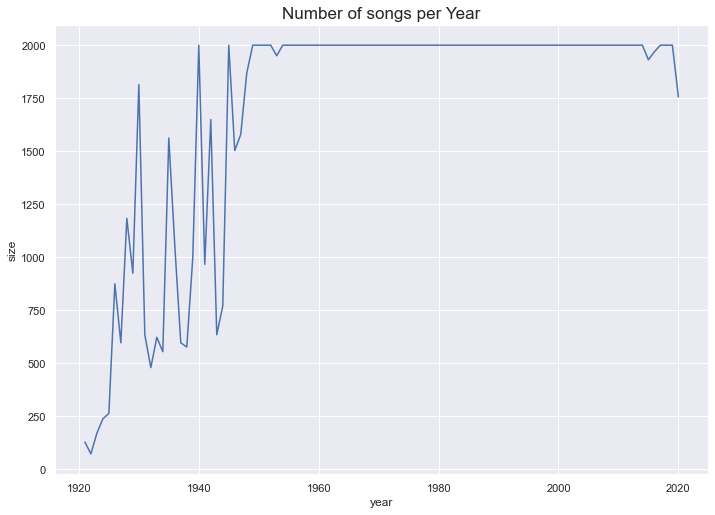

In [266]:
sns.lineplot(x='year', y='size', data=df1).set_title("Number of songs per Year", fontsize=17)

As the songs are spread across many different years, let's create year groups to allow  a better representation.

In [267]:
df1['Year Bin'] = pd.cut(df1['year'], bins = range(1920,2021,10))

In [268]:
df1.sample(5)

,year,size,Year Bin
3,1924,237,"(1920, 1930]"
31,1952,2000,"(1950, 1960]"
86,2007,2000,"(2000, 2010]"
53,1974,2000,"(1970, 1980]"
94,2015,1931,"(2010, 2020]"


Let's see how many songs we have in the dataset for each year group:

In [269]:
df1_yearbin = df1.groupby('Year Bin', as_index=False)['size'].sum()
df1_yearbin

,Year Bin,size
0,"(1920, 1930]",6260
1,"(1930, 1940]",9075
2,"(1940, 1950]",14968
3,"(1950, 1960]",19950
4,"(1960, 1970]",20000
5,"(1970, 1980]",20000
6,"(1980, 1990]",20000
7,"(1990, 2000]",20000
8,"(2000, 2010]",20000
9,"(2010, 2020]",19656


Transforming the information above into a visual representation using a barplot.

Text(0.5, 1.0, 'Number of songs per decade')

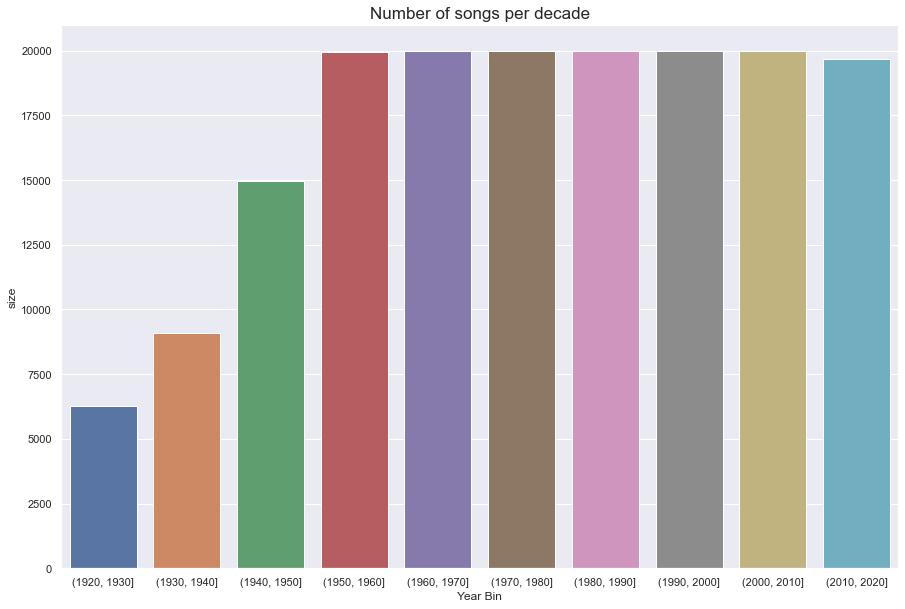

In [270]:
plt.figure(figsize=(15,10))
sns.barplot(x='Year Bin', y='size', data=df1_yearbin).set_title("Number of songs per decade", fontsize=17)

From the representation, we cleary see that the number of songs in our dataset before 1940 were fewer and these rapidly increased to about 20,000 in 1950 and have been constant until 2000-2010. The umber of songs in our dataset decrease in the year group 2010-2020.

### Distributions for the rest of the continuous variables

### Popularity
Exploring the popularity feature through a visual representation using a distribution plot.

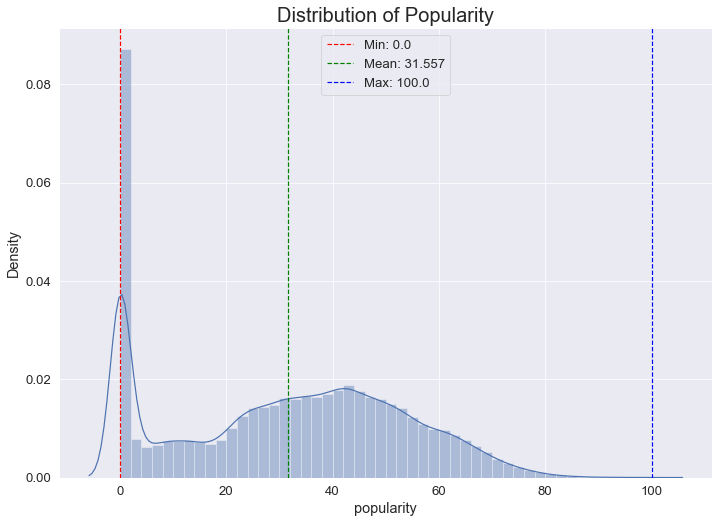

In [271]:
# Distribution of popularity score
sns.set_context("paper", font_scale=1.5)
sns.distplot(df.popularity).set_title("Distribution of Popularity", fontsize=20)
plt.axvline(df.popularity.min(), 0,1, label="Min: " + str(df.popularity.min()), color = 'red', linestyle='dashed')
plt.axvline(df.popularity.mean(), 0,1, label="Mean: " + str(round(df.popularity.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.popularity.max(), 0,1, label="Max: " + str(df.popularity.max()), color = 'blue', linestyle='dashed')
plt.legend()

As shown by the distribution above, the distribution of popularity has much fewer number of songs on the right of the halfway mark and significantly larger number of songs on the left. The popularity score with the largest density is 0, whereas the popularity score with the lowest number of density is between 85-100.

#### Multi class - 5 classes (new feature)

In [272]:
switcher = {}

for i in range(0, 21):
    switcher[i] = "Least Popular"
for i in range(21, 41): 
    switcher[i] = "Less Popular"
for i in range(41, 61): 
    switcher[i] = "Mildly Popular"
for i in range(61, 81): 
    switcher[i] = "More Popular"
for i in range(81, 101): 
    switcher[i] = "Most Popular"

In [273]:
def decide_class(txt):
    return switcher.get(int(txt))

In [274]:
df_numeric['multi_pop'] = df_numeric['popularity'].apply(decide_class)

In [275]:
df_numeric.sample(10)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,multi_pop
44742,0.41500,0.270,257333.0,0.366,0,0.227000,5,0.1200,-12.526,1,35.0,0.0381,123.216,0.0752,1987,Less Popular
123584,0.00204,0.331,180067.0,0.722,0,0.000054,7,0.2560,-8.461,1,49.0,0.0408,125.575,0.3490,1994,Mildly Popular
69344,0.01810,0.513,246560.0,0.546,0,0.000000,5,0.1220,-5.703,1,39.0,0.0282,141.876,0.2450,2007,Less Popular
7436,0.03040,0.469,350187.0,0.705,1,0.015500,7,0.6590,-5.134,1,53.0,0.0458,122.025,0.1370,2013,Mildly Popular
26958,0.49500,0.457,684543.0,0.528,0,0.586000,9,0.1300,-16.739,1,21.0,0.0598,111.809,0.7930,1968,Less Popular
117958,0.95700,0.361,391760.0,0.159,0,0.126000,3,0.0866,-17.349,1,0.0,0.0390,78.238,0.3460,1938,Least Popular
18717,0.56400,0.423,162133.0,0.520,0,0.000000,7,0.5720,-8.008,1,16.0,0.0310,126.652,0.8370,1965,Least Popular
16214,0.61300,0.405,287422.0,0.664,0,0.000001,4,0.5250,-5.497,1,0.0,0.0328,81.924,0.4000,2020,Least Popular
157518,0.69000,0.636,325173.0,0.732,0,0.014400,2,0.9090,-7.676,1,29.0,0.0340,106.769,0.7480,1981,Less Popular
4498,0.14700,0.775,223173.0,0.751,0,0.000202,10,0.0347,-5.803,0,38.0,0.0974,88.245,0.8340,1984,Less Popular


In [276]:
df_numeric['multi_pop'] = df_numeric['multi_pop'].astype('category')

In [277]:
df_numeric.multi_pop.dtype

CategoricalDtype(categories=['Least Popular', 'Less Popular', 'Mildly Popular',
                  'More Popular', 'Most Popular'],
, ordered=False)

In [278]:
df4_5 = df_numeric.groupby('multi_pop', as_index=False).size()
df4_5

,multi_pop,size
0,Least Popular,53188
1,Less Popular,51836
2,Mildly Popular,49268
3,More Popular,15160
4,Most Popular,457


Text(0.5, 1.0, 'Number of songs per popularity category')

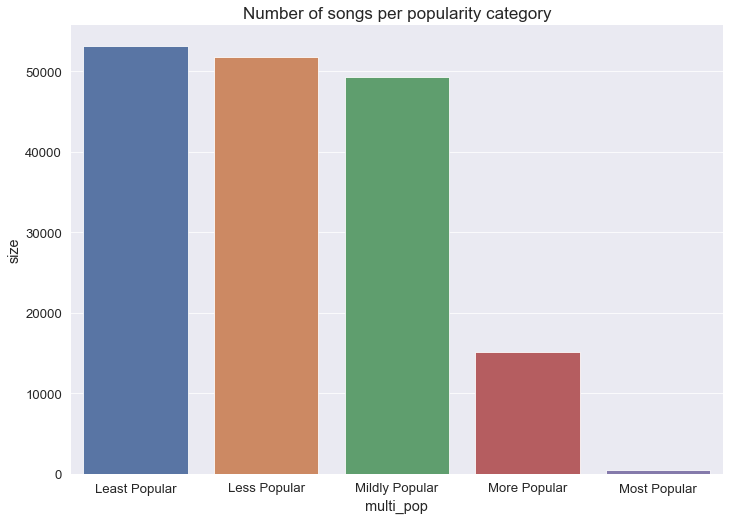

In [279]:
sns.barplot(x='multi_pop', y='size', data=df4_5).set_title("Number of songs per popularity category", fontsize=17)

#### Bin_plot (new feature)

Creating a new feature that represents population through a binary value with a split at 35. We chose 35 as the threshold as this value is close to the mean value of population (as represented in the distribution above). This feature will be helpful later in the modelling section.

In [280]:
df_numeric['bin_pop'] = df_numeric['popularity'].apply(lambda x: 0 if int(x)<35 else 1)

In [281]:
df.sample(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
164450,0.3330,['James Brown & The Famous Flames'],0.217,210467.0,0.411,0,0.000000,1,0.3640,-11.438,0,Lost Someone,28.0,1966-01-01,0.0405,184.561,0.363,1966
150764,0.2020,['98º'],0.694,283267.0,0.552,0,0.000000,9,0.1760,-10.452,0,Invisible Man,41.0,1998-01-01,0.0278,89.904,0.573,1998
44966,0.1400,['Depeche Mode'],0.617,289893.0,0.979,0,0.102000,2,0.9780,-9.299,1,"Strangelove - Live at Rose Bowl, Pasadena, CA,...",31.0,1989-03-13,0.0565,119.271,0.429,1989
88148,0.9950,['Ignacio Corsini'],0.494,159200.0,0.111,0,0.684000,5,0.1760,-23.239,1,El Beso de la Muerte - Remasterizado,0.0,1924-03-29,0.0653,127.714,0.634,1924
38266,0.2820,['Smut Peddlers'],0.500,240000.0,0.777,0,0.000026,2,0.4130,-7.104,1,Fuck You.......That's Why - Remastered,39.0,2001-01-01,0.0476,121.623,0.491,2001
45300,0.0985,"['Guru', ""N'Dea Davenport""]",0.782,243267.0,0.613,0,0.000472,6,0.0840,-11.451,0,When You're Near,42.0,1993-01-01,0.0864,92.069,0.634,1993
94744,0.6310,['Ricardo Montaner'],0.545,298293.0,0.499,0,0.000000,4,0.2390,-6.587,1,Me va a extrañar (aka Unchain My Heart),66.0,1990-01-01,0.0281,131.066,0.178,1990
12012,0.0138,"['Foghat', 'Don Berman']",0.458,337960.0,0.860,0,0.004890,6,0.0491,-9.728,0,Stone Blue,25.0,1978-01-01,0.0525,147.562,0.604,1978
72285,0.7570,['Jean Shepard'],0.579,146867.0,0.284,0,0.000052,0,0.1610,-9.901,1,"Forgive Me, John",13.0,1963-09-01,0.0306,117.523,0.632,1963
75559,0.5090,['Will Downing'],0.616,314200.0,0.477,0,0.000000,0,0.1030,-10.447,1,"Sorry, I",30.0,1995-01-01,0.0468,128.188,0.271,1995


In [282]:
df4_4 = df_numeric.groupby('bin_pop', as_index=False).size().sort_values(by='size',ascending=True)
df4_4

,bin_pop,size
1,1,82152
0,0,87757


Representing this new feature through a barplot.

Text(0.5, 1.0, 'Number of songs per popularity bin')

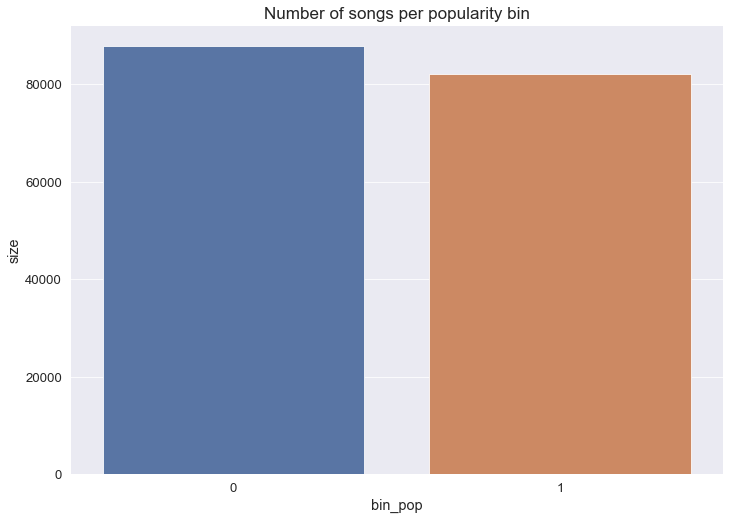

In [283]:
sns.barplot(x='bin_pop', y='size', data=df4_4).set_title("Number of songs per popularity bin", fontsize=17)

As we split the bins close to the mean value of the popularity distribution, both popular and non-popular sizes (represented by 1 and 0 respectively) are close together.

### Tempo
Exploring the tempo feature through a visual representation using a distribution plot.

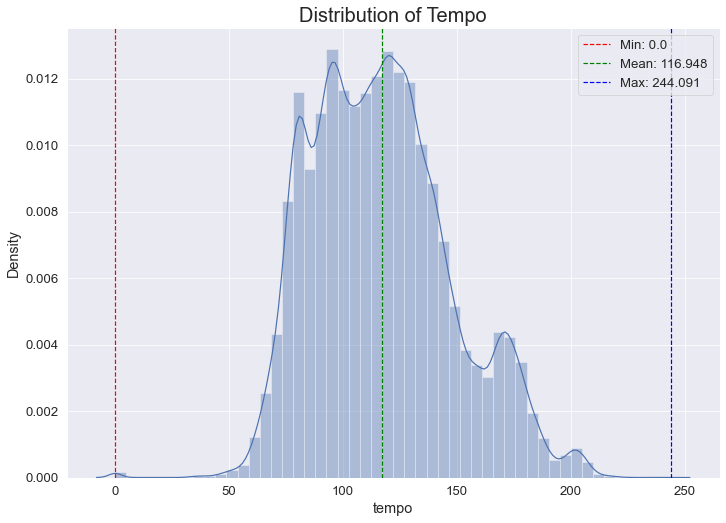

In [284]:
sns.distplot(df.tempo).set_title("Distribution of Tempo", fontsize=20)
plt.axvline(df.tempo.min(), 0,1, label="Min: " + str(df.tempo.min()), color = 'red', linestyle='dashed')
plt.axvline(df.tempo.mean(), 0,1, label="Mean: " + str(round(df.tempo.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.tempo.max(), 0,1, label="Max: " + str(df.tempo.max()), color = 'blue', linestyle='dashed')
plt.legend()

Most of the songs have an average tempo between 80-120 and having fewer songs at either ends of the tempo range.

### Acousticness
Exploring the acousticness feature through a visual representation using a distribution plot. 

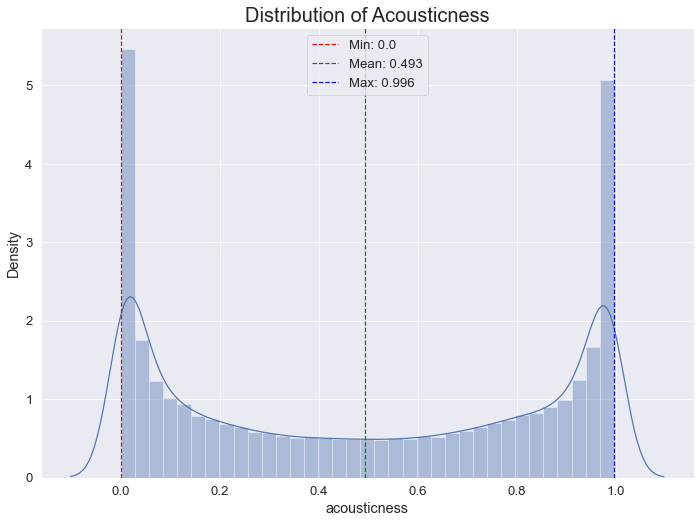

In [285]:
sns.distplot(df.acousticness).set_title("Distribution of Acousticness", fontsize=20)
plt.axvline(df.acousticness.min(), 0,1, label="Min: " + str(df.acousticness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.acousticness.mean(), 0,1, label="Mean: " + str(round(df.acousticness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.acousticness.max(), 0,1, label="Max: " + str(df.acousticness.max()), color = 'blue', linestyle='dashed')
plt.legend()

The acousticness distribution is represents an upside down bell curve, with the highest distribution being at either ends of the acousticness range and lowest distribution being near the middle of the range. This shows us that most songs are either acoustic or not, with slightly more songs not being acoustic.

### Instrumentalness
Exploring the instrumentalness feature through a visual representation using a distribution plot.

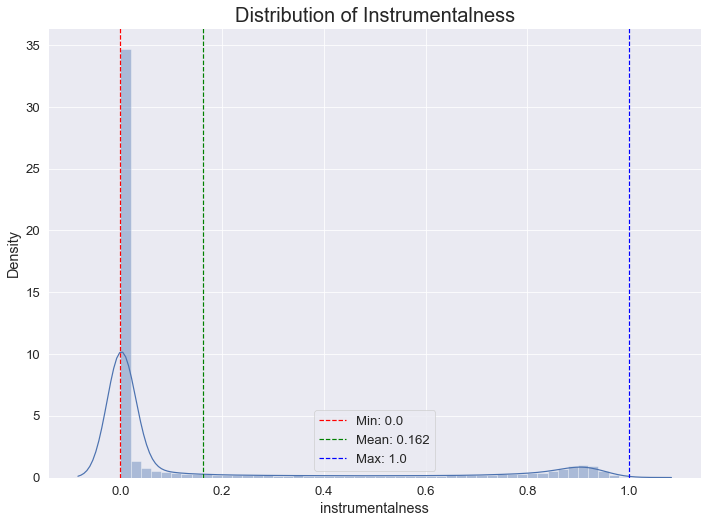

In [286]:
sns.distplot(df.instrumentalness).set_title("Distribution of Instrumentalness", fontsize=20)
plt.axvline(df.instrumentalness.min(), 0,1, label="Min: " + str(df.instrumentalness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.instrumentalness.mean(), 0,1, label="Mean: " + str(round(df.instrumentalness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.instrumentalness.max(), 0,1, label="Max: " + str(df.instrumentalness.max()), color = 'blue', linestyle='dashed')
plt.legend()

The instrumentalness distribution shows us that most of the songs in the dataset are not instrumental. Another small peak at the opposite end of the distribution shows us that are are a bunch of songs that are mostly instrumental.

### Speechiness
Exploring the speechiness feature through a visual representation using a distribution plot.

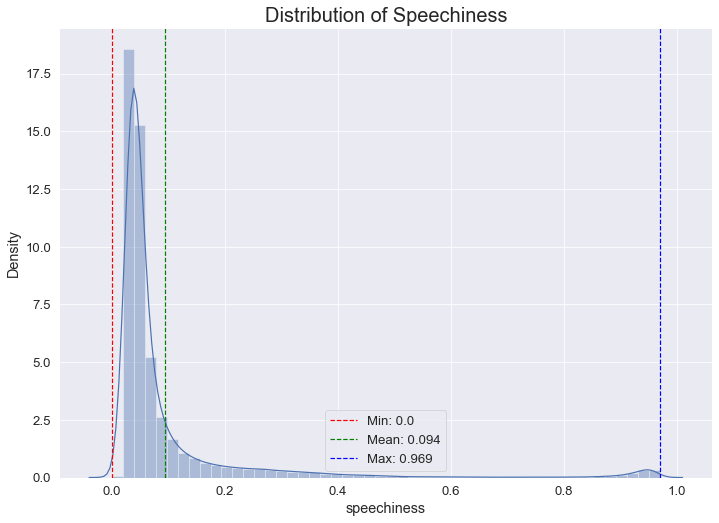

In [287]:
sns.distplot(df.speechiness).set_title("Distribution of Speechiness", fontsize=20)
plt.axvline(df.speechiness.min(), 0,1, label="Min: " + str(df.speechiness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.speechiness.mean(), 0,1, label="Mean: " + str(round(df.speechiness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.speechiness.max(), 0,1, label="Max: " + str(df.speechiness.max()), color = 'blue', linestyle='dashed')
plt.legend()

The speechiness distribution is extremely skewed to the left with a majority of the songs containing much fewer words. As the value of speechiness increases, the distribution of songs decreases.

### Valence
Exploring the valence feature through a visual representation using a distribution plot.

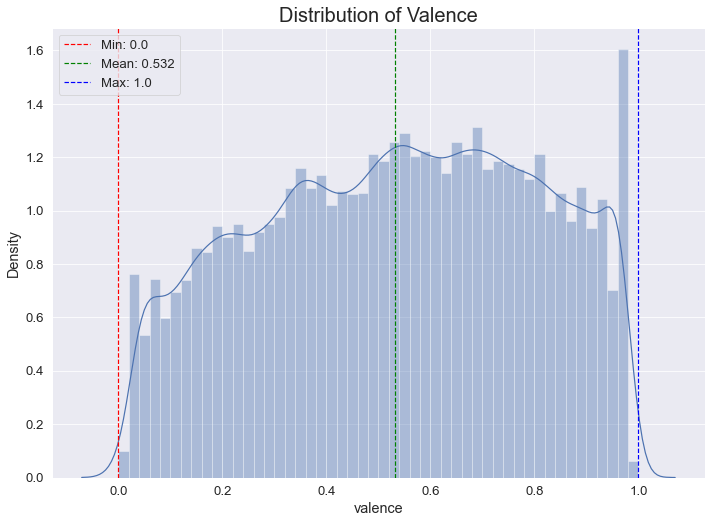

In [288]:
sns.distplot(df.valence).set_title("Distribution of Valence", fontsize=20)
plt.axvline(df.valence.min(), 0,1, label="Min: " + str(df.valence.min()), color = 'red', linestyle='dashed')
plt.axvline(df.valence.mean(), 0,1, label="Mean: " + str(round(df.valence.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.valence.max(), 0,1, label="Max: " + str(df.valence.max()), color = 'blue', linestyle='dashed')
plt.legend()

The distribution of valence is more unformly distributed than than the other features so far. There is an anamolous value that peaks at a valence of 0.98.

### Danceability
Exploring the danceability feature through a visual representation using a distribution plot.

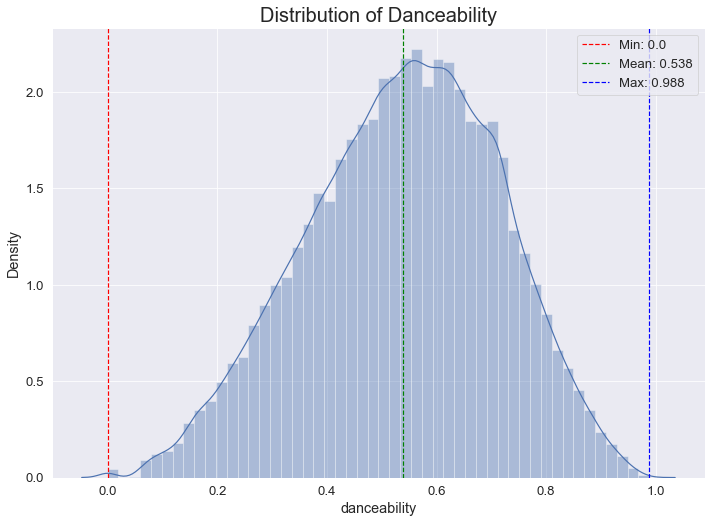

In [289]:
sns.distplot(df.danceability).set_title("Distribution of Danceability", fontsize=20)
plt.axvline(df.danceability.min(), 0,1, label="Min: " + str(df.danceability.min()), color = 'red', linestyle='dashed')
plt.axvline(df.danceability.mean(), 0,1, label="Mean: " + str(round(df.danceability.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.danceability.max(), 0,1, label="Max: " + str(df.danceability.max()), color = 'blue', linestyle='dashed')
plt.legend()

The danceability distribution represents a good bell curve with the mean value being very close to the middle value of the range. Most of the songs have a danceability between 0.4 and 0.8.

### Energy
Exploring the energy feature through a visual representation using a distribution plot.

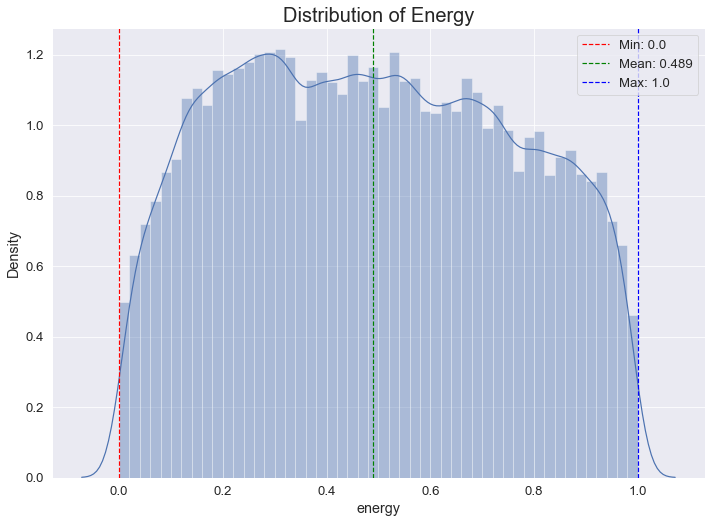

In [290]:
sns.distplot(df.energy).set_title("Distribution of Energy", fontsize=20)
plt.axvline(df.energy.min(), 0,1, label="Min: " + str(df.energy.min()), color = 'red', linestyle='dashed')
plt.axvline(df.energy.mean(), 0,1, label="Mean: " + str(round(df.energy.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.energy.max(), 0,1, label="Max: " + str(df.energy.max()), color = 'blue', linestyle='dashed')
plt.legend()

The energy distribution represents a more unifrom spread with a gradual peak at 0.2 that fluctuates until 0.6. Our dataset contains songs with a good range of different energy measures.

### Liveness
Exploring the liveness feature through a visual representation using a distribution plot.

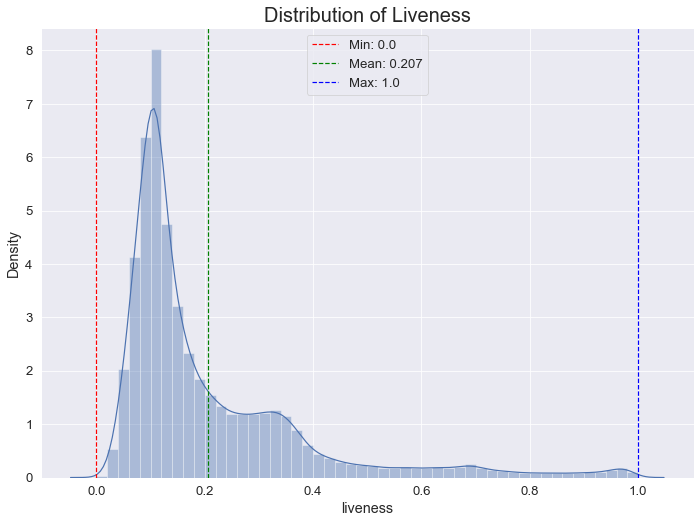

In [291]:
sns.distplot(df.liveness).set_title("Distribution of Liveness", fontsize=20)
plt.axvline(df.liveness.min(), 0,1, label="Min: " + str(df.liveness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.liveness.mean(), 0,1, label="Mean: " + str(round(df.liveness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.liveness.max(), 0,1, label="Max: " + str(df.liveness.max()), color = 'blue', linestyle='dashed')
plt.legend()

The liveness distribution is skewed to the left. This means that most of the songs were not performed in front of an audience. As the liveness score increases, the number of songs decreases, meaning that fewer of the songs were performed in front of a larger audience.

### Loudness
Exploring the loudness feature through a visual representation using a distribution plot.

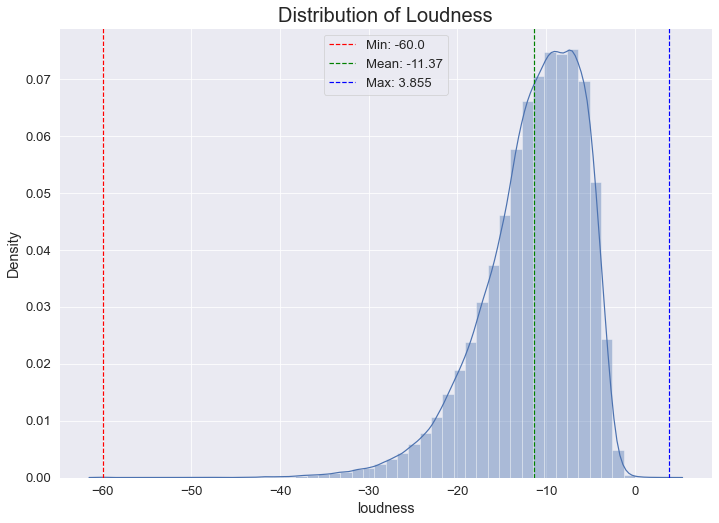

In [292]:
sns.distplot(df.loudness).set_title("Distribution of Loudness", fontsize=20)
plt.axvline(df.loudness.min(), 0,1, label="Min: " + str(df.loudness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.loudness.mean(), 0,1, label="Mean: " + str(round(df.loudness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.loudness.max(), 0,1, label="Max: " + str(df.loudness.max()), color = 'blue', linestyle='dashed')
plt.legend()

The loudness distribution is skewed towards the right with a majority of the songs having a loudness between -15 to -5 db. 

### Duration
Exploring the duration feature through a visual representation using a distribution plot.

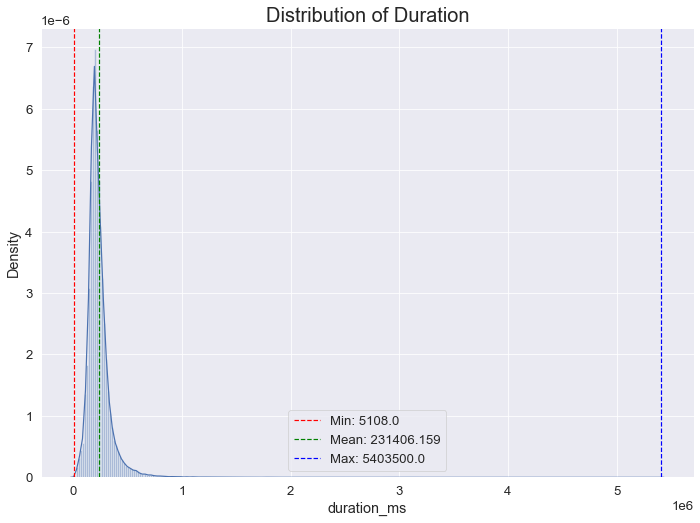

In [293]:
sns.distplot(df.duration_ms,bins=300).set_title("Distribution of Duration", fontsize=20)
plt.axvline(df.duration_ms.min(), 0,1, label="Min: " + str(df.duration_ms.min()), color = 'red', linestyle='dashed')
plt.axvline(df.duration_ms.mean(), 0,1, label="Mean: " + str(round(df.duration_ms.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.duration_ms.max(), 0,1, label="Max: " + str(df.duration_ms.max()), color = 'blue', linestyle='dashed')
plt.legend()

As the majority of the songs have a much lower duration time, shown by the extreme left skewness of the distribution, let's zoom in on this area to get a better understanding of the representation.

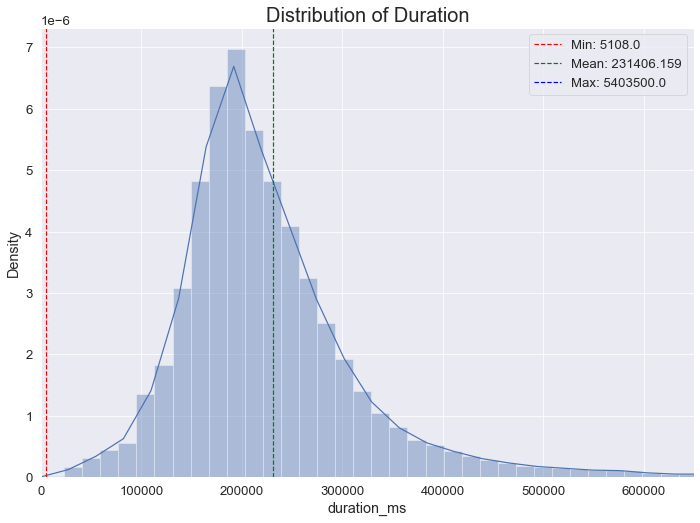

In [294]:
g = sns.distplot(df.duration_ms,bins=300)
g.set_xlim(0,650000)
g.set_title("Distribution of Duration", fontsize=20)
plt.axvline(df.duration_ms.min(), 0,1, label="Min: " + str(df.duration_ms.min()), color = 'red', linestyle='dashed')
plt.axvline(df.duration_ms.mean(), 0,1, label="Mean: " + str(round(df.duration_ms.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.duration_ms.max(), 0,1, label="Max: " + str(df.duration_ms.max()), color = 'blue', linestyle='dashed')
plt.legend()

The duration distribution is extremely skewed to the left (as seen the first distribution) with a majority of the songs being very short.

### Artists
Exploring the artist feature.
The artist names for each song in our dataset are stored in a list. This is because some songs are produced by more than one artists. However, this makes it difficult for us to analyse ou data fo different artists. 

In [295]:
df["artists"]

0                              ['Carl Woitschach']
1         ['Robert Schumann', 'Vladimir Horowitz']
2                          ['Seweryn Goszczyński']
3                             ['Francisco Canaro']
4         ['Frédéric Chopin', 'Vladimir Horowitz']
                            ...                   
169904                      ['DripReport', 'Tyga']
169905          ['Leon Bridges', 'Terrace Martin']
169906                       ['Kygo', 'Oh Wonder']
169907               ['Cash Cash', 'Andy Grammer']
169908                          ['Ingrid Andress']
Name: artists, Length: 169909, dtype: object

We need to remove the artist names from lists while making sure the artist values are still atomic. To do this we separated multiple artists from songs that have more than one artist and created different entries for them.

In [296]:
all_artists = []
for i in df["artists"]: 
    i = eval(i) #convert string of list to list type
    for j in i:
        all_artists.append(j)
all_artists[:10]

['Carl Woitschach',
 'Robert Schumann',
 'Vladimir Horowitz',
 'Seweryn Goszczyński',
 'Francisco Canaro',
 'Frédéric Chopin',
 'Vladimir Horowitz',
 'Felix Mendelssohn',
 'Vladimir Horowitz',
 'Franz Liszt']

In [297]:
print(len(all_artists))

225456


In [298]:
artists_names = pd.DataFrame(all_artists, columns=['artist'])
artists_names = artists_names.groupby('artist')['artist'].count().reset_index(name="song_count")
artists_names= pd.DataFrame(artists_names.sort_values(by="song_count",  ascending=False))
artists_names

,artist,song_count
8039,Francisco Canaro,2234
27525,Эрнест Хемингуэй,1215
8298,Frédéric Chopin,1035
14826,Ludwig van Beethoven,976
26605,Wolfgang Amadeus Mozart,938
...,...,...
14300,Livingston Taylor,1
14302,"Liz Callaway, Howard McGillin, David Zippel, L...",1
14303,Liz Damon's Orient Express,1
2365,Bernard Leighton,1


Now time to represent the artists and the number of songs produced by them viually through a bar plot. However, since the number of artists in our dataset is too large (over 27,000)and we can't represent all them them in a meaningful manner, we will only represent artists that have over 500 songs.

In [299]:
artists_with_more_than_500_songs = artists_names[artists_names['song_count']>500]

<AxesSubplot:xlabel='artist', ylabel='song_count'>

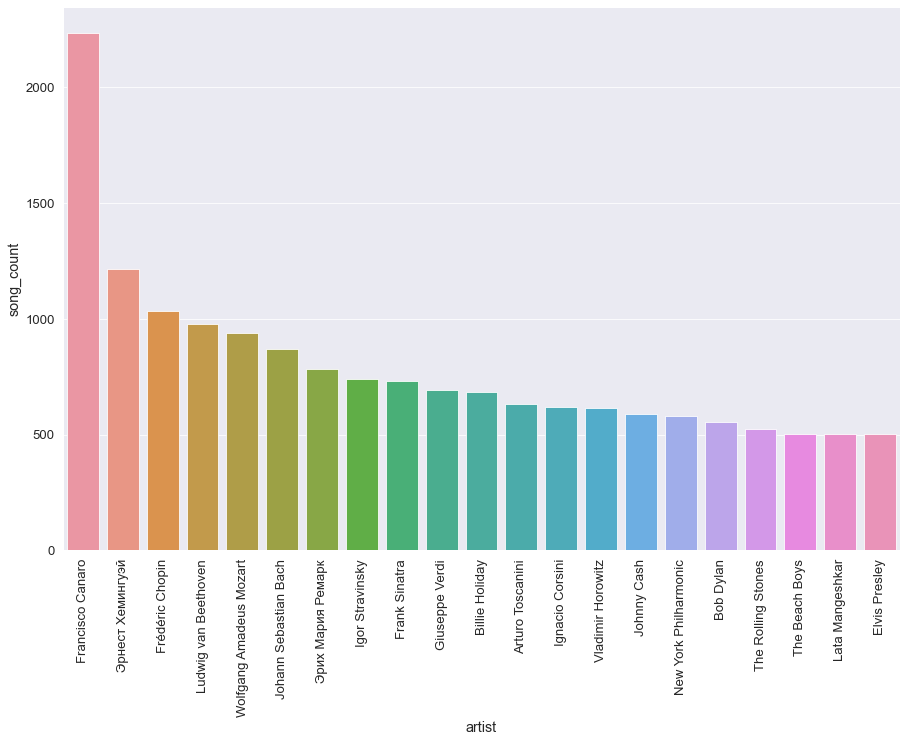

In [300]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x="artist", y="song_count", data=artists_with_more_than_500_songs)

Most of the artists, who have produced over 500 songs, have mostly produced between 500-1000 songs. However, one artist that has produced a significantly greater number of songs and stands out in the representation is Franscisco Canaro with over 2200 songs.

### Feature Trends with Time

Let's now observe the the different song feature trends over the span of different years represented through line plots.
We will do this by grouping the different features by year.

Code taken from: https://www.kaggle.com/richardcsuwandi/spotify-time-series-analysis/notebook 

In [301]:
year_avg = df[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness","speechiness", 
               "year",'duration_ms', 'popularity']].groupby("year").mean().sort_values(by="year").reset_index()

year_avg.sample(10)

,year,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness,duration_ms,popularity
76,1997,0.303143,0.577967,0.601817,0.107330,0.203889,117.759475,0.546264,-9.140692,0.090028,246396.506000,45.183500
37,1958,0.777831,0.481585,0.311423,0.186284,0.203815,112.869024,0.495315,-14.278112,0.057850,212955.166000,18.155500
66,1987,0.301076,0.543011,0.587712,0.098809,0.199632,120.406542,0.542480,-11.524220,0.058382,249306.277000,39.187000
43,1964,0.686365,0.506586,0.397462,0.155721,0.220217,115.038635,0.567548,-13.020535,0.065153,197745.702500,25.147500
38,1959,0.777088,0.488865,0.316798,0.178835,0.196394,112.506105,0.487513,-14.324556,0.071848,216623.042000,19.805000
23,1944,0.893705,0.507083,0.260941,0.439483,0.235994,107.232931,0.548159,-14.489404,0.171820,247493.179454,2.678804
7,1928,0.946188,0.529696,0.207143,0.516979,0.177988,106.195246,0.492954,-17.316193,0.135313,217498.311919,1.536771
21,1942,0.851036,0.465814,0.257303,0.390267,0.213302,106.197030,0.473811,-15.030011,0.082635,221935.656762,0.953911
86,2007,0.241804,0.564830,0.673011,0.071562,0.195316,123.470123,0.515104,-6.993948,0.083876,242951.749500,50.708500
15,1936,0.795903,0.533000,0.306198,0.301757,0.225570,109.981641,0.551709,-13.795905,0.214865,248519.716319,5.010436


#### Acousticness, Intrumentalness, Valence and Speechiness Over Time

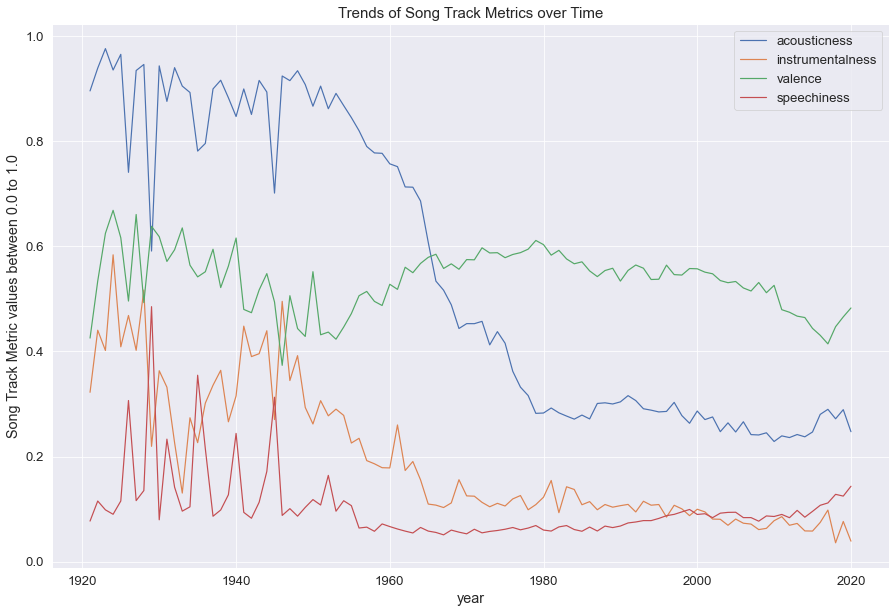

In [302]:
plt.figure(figsize=(15,10))
plt.title("Trends of Song Track Metrics over Time", fontdict={"fontsize": 15})
#all these within 0.0 to 1.0 range values
lines = ["acousticness","instrumentalness", "valence", "speechiness"]
for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
    
plt.ylabel("Song Track Metric values between 0.0 to 1.0")
plt.legend(lines)

Throughout the years (1920-2020) the trend of:
- acousticness in songs has decreased significantly. This means that newer songs have more vocals than older songs.
- instrumentalness in songs has decreased. Meaning that newer songs are not as instrumental as older songs.
- valence in songs has decreased slightly. Menaing that the musical positiveness conveyed by newer tracks is slightly lower.
- speechiness in songs has decreased slightly. Menaing that newer songs have slightly fewer lyrics.

#### Energy, Danceability and Liveness Over Time

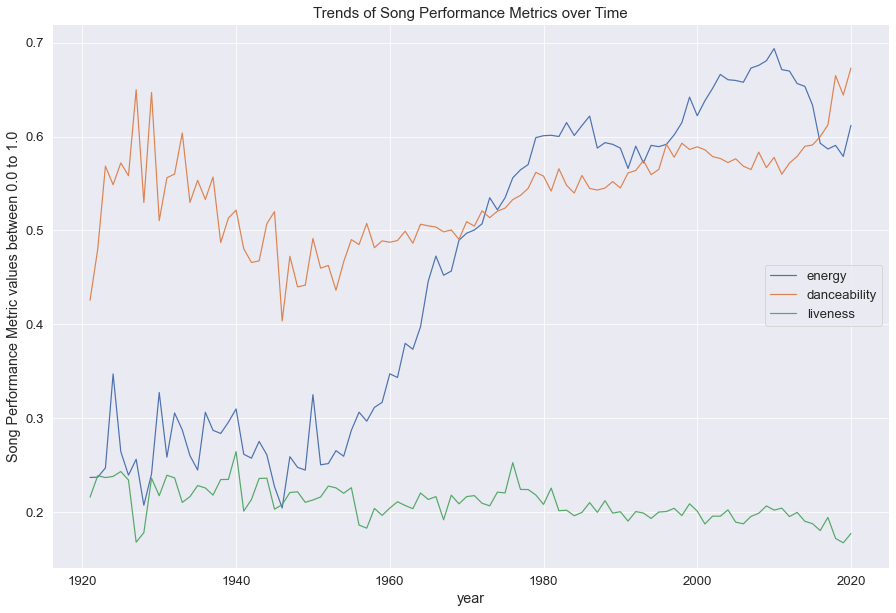

In [303]:
plt.figure(figsize=(15,10))
plt.title("Trends of Song Performance Metrics over Time", fontdict={"fontsize": 15})
#all these within 0.0 to 1.0 range values
lines = ["energy", "danceability", "liveness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
    
    
plt.ylabel("Song Performance Metric values between 0.0 to 1.0")
plt.legend(lines)

Throughout the years (1920-2020) the trend of:
- energy in songs has increased significantly. This means that newer songs are far more more energetic (they have faster beats and are louder).
- danceability in songs shows a dip in the 1960 but has rised to its highestin 2020. Newer songs are slightly more danceable than the songs of 1920. 
- liveness in songs has decreased slightly. This means that fewer songs are performed live now.

####  Popularity Over Time

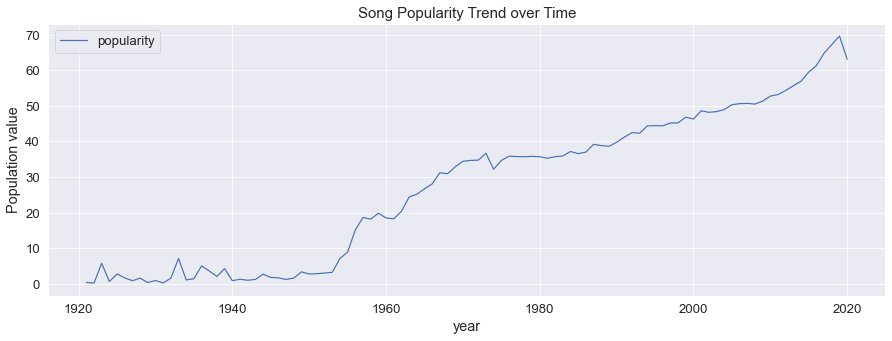

In [304]:
plt.figure(figsize=(15,5))
plt.title("Song Popularity Trend over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='popularity', data=year_avg)
    
    
plt.ylabel("Population value")
plt.legend(['popularity'])

The general trend shows that newer songs are far more popular than older songs.

#### Song Duration Over Time

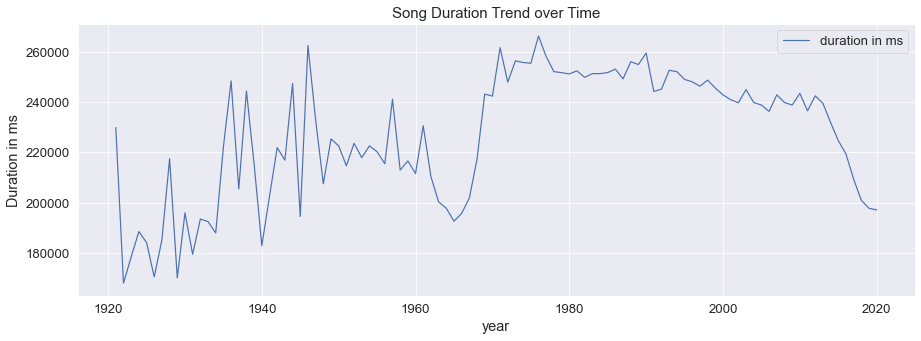

In [305]:
plt.figure(figsize=(15,5))
plt.title("Song Duration Trend over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='duration_ms', data=year_avg)
    
    
plt.ylabel("Duration in ms")
plt.legend(['duration in ms'])

There is a lot of fluctuation between the lengths of songs across the years. Songs in 1978 were on average the longest and songs in 1922 were on average the shortest. Songs in 2020 are much shorter than in the early 2000's.

#### Song Tempo Over Time

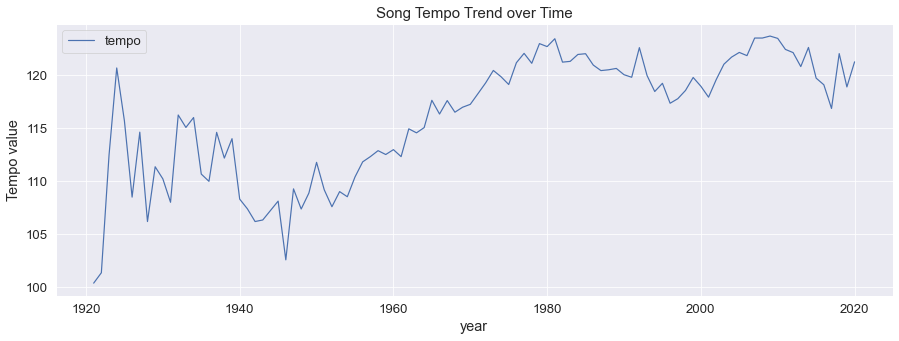

In [306]:
plt.figure(figsize=(15,5))
plt.title("Song Tempo Trend over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='tempo', data=year_avg)
    
    
plt.ylabel("Tempo value")
plt.legend(['tempo'])

The overall trend of tempo in songs has increased over time. There was a sudden rise in average tempo from the year 1920 to 1925 and a sudden drop to the lowest tempo in the year 1944.

#### Loudness Over Time

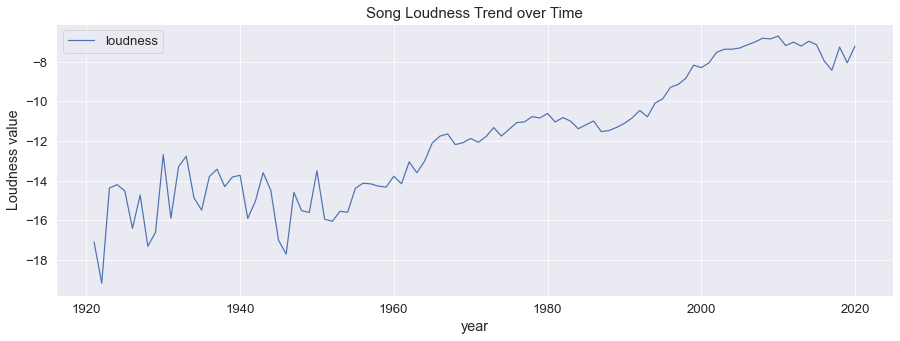

In [307]:
plt.figure(figsize=(15,5))
plt.title("Song Loudness Trend over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='loudness', data=year_avg)
    
    
plt.ylabel("Loudness value")
plt.legend(['loudness'])

The loudness of songs over the years has increased on average.

### Feature Trends with Popularity

Let's now observe the the different song features against popularity trends represented thorugh line plots. We will do this by grouping the different features by popularity. This is significant for our analysis as out question depends particularily of the popularity of songs.

In [308]:
pop_avg = df[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness","speechiness", 
               "year",'duration_ms', 'popularity']].groupby("popularity").mean().sort_values(by="popularity").reset_index()

pop_avg.sample(10)

,popularity,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness,year,duration_ms
88,88.0,0.248767,0.688500,0.619583,0.000071,0.147067,129.886667,0.563475,-6.300083,0.082867,2019.500000,199410.750000
83,83.0,0.211622,0.679864,0.622051,0.005872,0.173529,121.048797,0.483792,-6.712763,0.107692,2013.627119,211113.796610
6,6.0,0.849786,0.498282,0.289540,0.268510,0.204707,113.610198,0.511218,-14.544630,0.077373,1951.073557,203427.253259
36,36.0,0.357120,0.542529,0.559974,0.116525,0.201236,119.463775,0.555941,-10.818326,0.074044,1983.647667,244171.479515
20,20.0,0.607185,0.501984,0.422437,0.172633,0.221841,116.038822,0.550793,-13.025353,0.076431,1965.352490,224678.273946
69,69.0,0.267493,0.612879,0.614565,0.050012,0.179558,121.726340,0.477331,-7.712125,0.098939,2010.376190,215326.072619
25,25.0,0.464598,0.518266,0.503759,0.125649,0.221439,120.092498,0.575371,-12.045743,0.063412,1972.322436,236016.341643
39,39.0,0.330102,0.551398,0.585326,0.110733,0.204086,120.527255,0.560148,-10.077653,0.076243,1988.275105,246218.011158
73,73.0,0.242371,0.655329,0.627154,0.023178,0.178637,120.723490,0.523414,-6.972575,0.103569,2010.613793,219465.926437
74,74.0,0.246181,0.648685,0.624538,0.022486,0.171466,121.907517,0.507990,-7.103455,0.099239,2009.862559,213626.464455


#### Acousticness, Intrumentalness, Valence and Speechiness Against Popularity

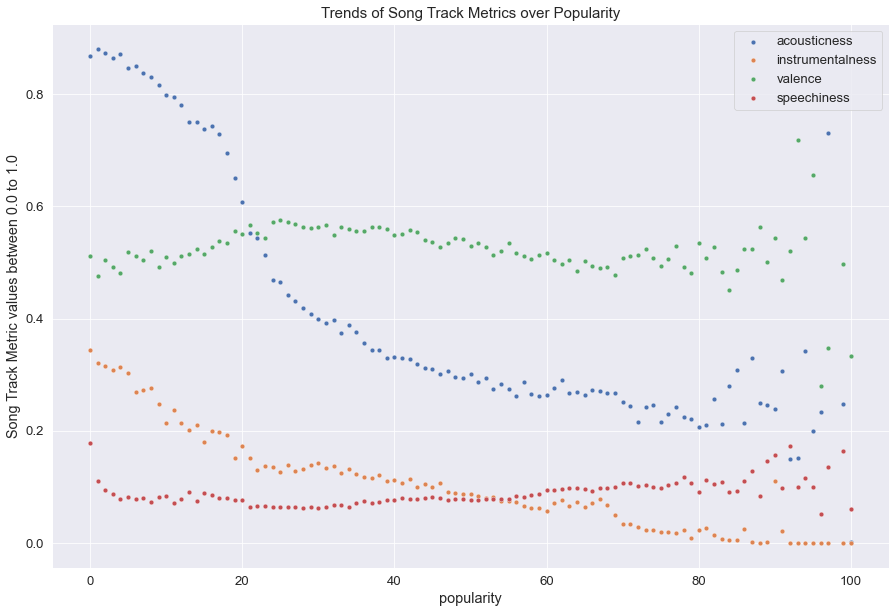

In [309]:
plt.figure(figsize=(15,10))
plt.title("Trends of Song Track Metrics over Popularity", fontdict={"fontsize": 15})
#all these within 0.0 to 1.0 range values
lines = ["acousticness","instrumentalness", "valence", "speechiness"]

for line in lines:
    ax = sns.scatterplot(x='popularity', y=line, data=pop_avg)
    
plt.ylabel("Song Track Metric values between 0.0 to 1.0")
plt.legend(lines)

- lower acousticness leads to songs with a higher popularity.
- lower instrumentalness leads to songs with a higher popularity. 
- valence around 0.5 is the average and shows no significant trend for song popularity.
- speechiness shows no significant trend in song popularity.

#### Energy, Danceability and Liveness Against Popularity

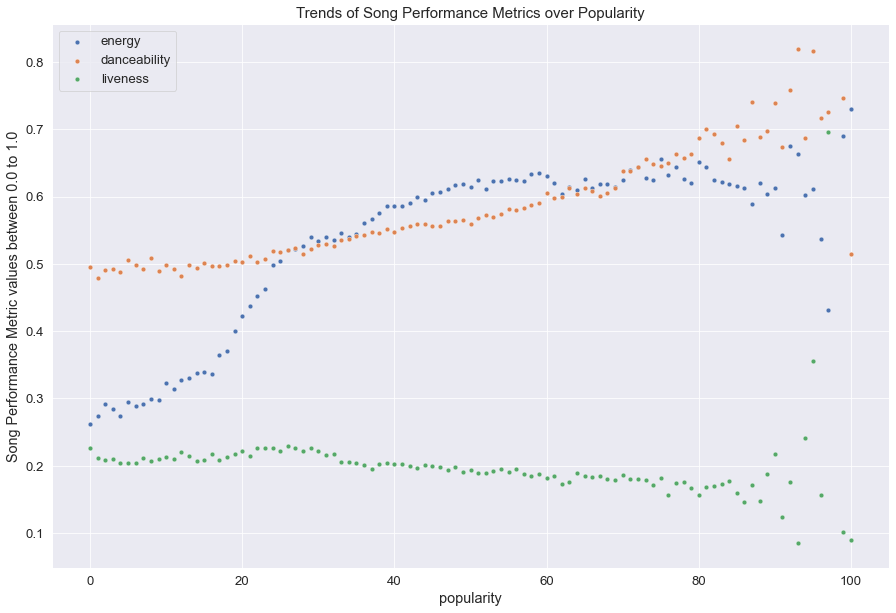

In [310]:
plt.figure(figsize=(15,10))
plt.title("Trends of Song Performance Metrics over Popularity", fontdict={"fontsize": 15})
#all these within 0.0 to 1.0 range values
lines = ["energy","danceability", "liveness"]

for line in lines:
    ax = sns.scatterplot(x='popularity', y=line, data=pop_avg)
    
plt.ylabel("Song Performance Metric values between 0.0 to 1.0")
plt.legend(lines)

- on average, more energetic songs show higher popularity.
- on average, songs with a higher danceability show higher popularity.
- on average, songs that are not live show higher popularity.

#### Song Duration Over Popularity

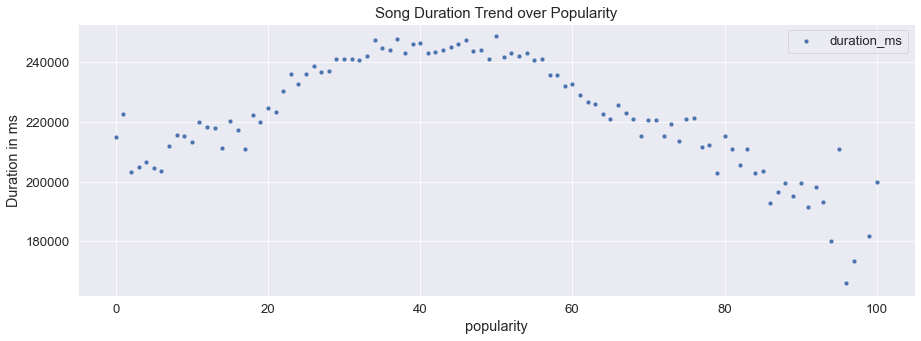

In [311]:
plt.figure(figsize=(15,5))
plt.title("Song Duration Trend over Popularity", fontdict={"fontsize": 15})

ax = sns.scatterplot(x='popularity', y='duration_ms', data=pop_avg)
    
    
plt.ylabel("Duration in ms")
plt.legend(['duration_ms'])

Here, we can observe that more popular song tend to have less song duration. 

#### Song Tempo Against Popularity

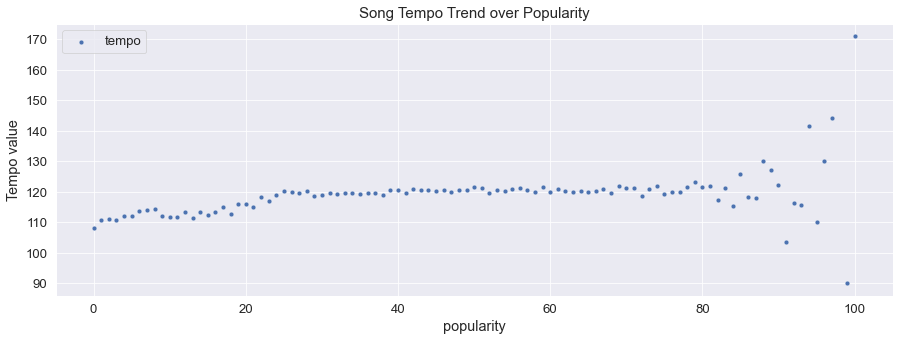

In [312]:
plt.figure(figsize=(15,5))
plt.title("Song Tempo Trend over Popularity", fontdict={"fontsize": 15})

ax = sns.scatterplot(x='popularity', y='tempo', data=pop_avg)
    
    
plt.ylabel("Tempo value")
plt.legend(['tempo'])

On average, most songs have a tempo around 120...

#### Loudness Against Popularity

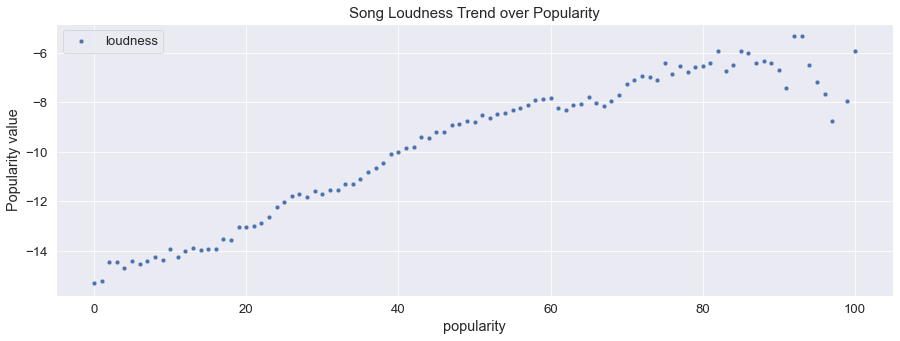

In [313]:
plt.figure(figsize=(15,5))
plt.title("Song Loudness Trend over Popularity", fontdict={"fontsize": 15})

ax = sns.scatterplot(x='popularity', y='loudness', data=pop_avg)
    
    
plt.ylabel("Popularity value")
plt.legend(['loudness'])

On average, loud songs have higher popularity.

### General Relationships
We will now explore the general replationships between the different features by looking at the correlations values.

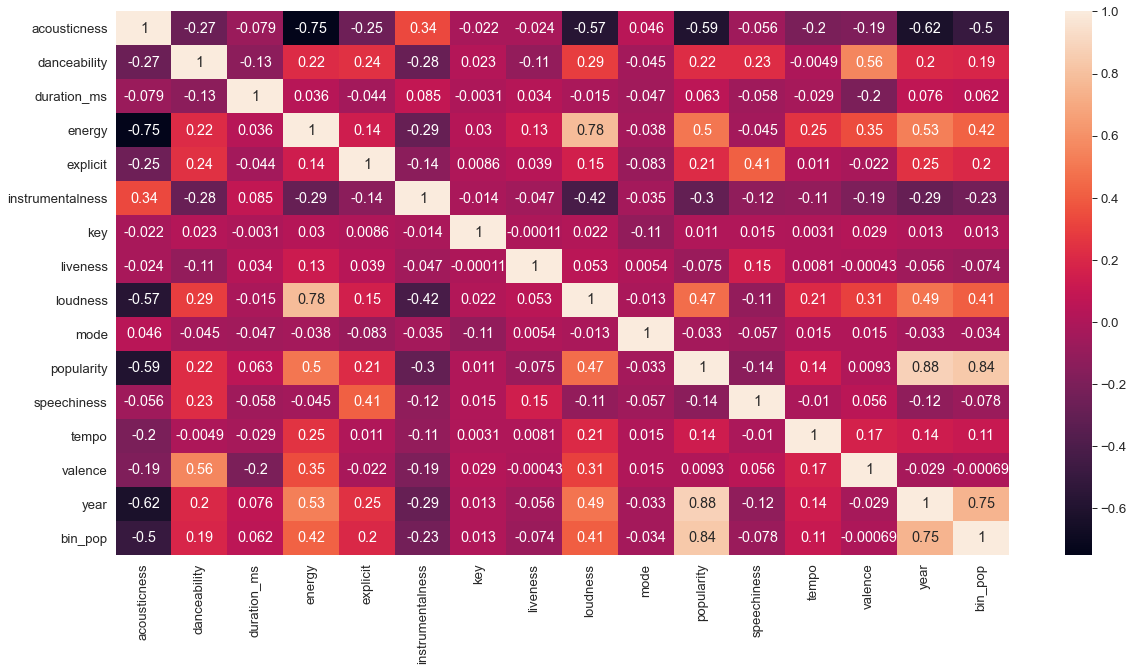

In [314]:
plt.figure(figsize=(20,10))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

While many of the features above indicate a no or small correlation with each other, some of them stand out with strong correlations. <br> <br>
Out of all variables, *acousticness, danceability, energy, loudness, popularity, valence and year* show some significant correlations. <br>Danceability & valence show a comparatively stronger positive relationship with each other and that is their only significant correlation. <br> 
Now, the rest of the variables from the selected ones are: acousticness, energy, loudness, popularity, and year
- Acousticness has strong negative correlations with the rest of the 4 features.  
- Energy and Loudeness features have strong positive correlations with with other and reasonable positive correlations with popularity and year variables. They also have strong negative correlations with acousticness.
- Popularity and Year features have strong positive correlation with each other. They have reasonable positive correlations with energy and loudness variables. They have a negative correlation with acousticness. 


So, in terms of popularity, from all the exploratory analysis and the correlations derived from this heatmap, we can deduce that <br>the 4 variables: **acousticness, energy, loudness,and year have the most impact on popularity**.

## Models and Prediction

### Regression

In [83]:
X1 = df[['acousticness', 'danceability', 
            'duration_ms', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

Y1 = df[['popularity']]
X1 = sm.add_constant(X1)
model1 = sm.OLS(Y1, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:41:12   Log-Likelihood:            -7.1087e+05
No. Observations:              169909   AIC:                         1.422e+06
Df Residuals:                  169898   BIC:                         1.422e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.9024      0.398  

In [84]:
lr_stats = sm.OLS(Y1, X1).fit()

# print the coefficients
lr_stats.params
lr_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:41:12   Log-Likelihood:            -7.1087e+05
No. Observations:              169909   AIC:                         1.422e+06
Df Residuals:                  169898   BIC:                         1.422e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.9024      0.398    102.851      0.000      40.123      41.682
acousticness       -23.2082      0.168   -138.233      0.000     -23.537     -22.879
danceability        27.0802      0.298     90.813      0.000      26.496      27.665
duration_ms       5.166e-07   3.29e-07      1.571      0.116   -1.28e-07    1.16e-06
energy              11.1166      0.318     35.013      0.000      10.494      11.739
instrumentalness    -7.0411      0.144    -48.797      0.000      -7.324      -6.758
liveness            -7.6301      0.228    -33.425      0.000      -8.078      -7.183
loudness             0.3234      0.012     26.790      0.000       0.300       0.347
speechiness        -25.7627      0.278    -92.590      0.000     -26.308     -25.217
tempo                0.0256      0.001     19.357      0.000       0.023       0.028
valence            -22.9175      0.197   -116.497      0.000     -23.303     -22.532
==============================================================================
Omnibus:                     7118.213   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8048.157
Skew:                           0.521   Prob(JB):                         0.00
Kurtosis:                       3.224   Cond. No.                     3.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Decision Trees Multiclass

In [85]:
clf = DecisionTreeClassifier()

In [86]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop'])
Y = df_numeric['popularity']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [87]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [88]:
y_pred = clf.predict(x_test)

In [89]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred, average="weighted"))
print(metrics.recall_score(y_test,y_pred, average="weighted"))
print(metrics.f1_score(y_test,y_pred, average="weighted"))

0.16182096403978577
0.16513636084658034
0.16182096403978577
0.1633911399400444


### Random Forest Multiclass

In [90]:
rfc = RandomForestClassifier(n_estimators=50, random_state=42, criterion='entropy')

In [91]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop'])
Y = df_numeric['popularity']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [92]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [93]:
y_pred = rfc.predict(x_test)

In [94]:
print("Accuracy  -> ", metrics.accuracy_score(y_test, y_pred))
print("Precision -> ", metrics.precision_score(y_test,y_pred, average="weighted"))
print("Recall    -> ",metrics.recall_score(y_test,y_pred, average="weighted"))
print("F1 Score  -> ",metrics.f1_score(y_test,y_pred, average="weighted"))

Accuracy  ->  0.19719263139309046
Precision ->  0.15510363802770716
Recall    ->  0.19719263139309046
F1 Score  ->  0.16968511799500124


### Decision Trees Multiclass (restricted)

In [95]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop'])
Y = df_numeric['multi_pop']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [96]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [97]:
y_pred = clf.predict(x_test)

In [98]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred, average="weighted"))
print(metrics.recall_score(y_test,y_pred, average="weighted"))
print(metrics.f1_score(y_test,y_pred, average="weighted"))

0.6506974280501442
0.6522036562931586
0.6506974280501442
0.6514099398751763


### Random Forest Multiclass

In [99]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop'])
Y = df_numeric['multi_pop']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [100]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [101]:
y_pred = rfc.predict(x_test)

In [102]:
print("Accuracy  -> ", metrics.accuracy_score(y_test, y_pred))
print("Precision -> ", metrics.precision_score(y_test,y_pred, average="weighted"))
print("Recall    -> ",metrics.recall_score(y_test,y_pred, average="weighted"))
print("F1 Score  -> ",metrics.f1_score(y_test,y_pred, average="weighted"))

Accuracy  ->  0.7469836972514861
Precision ->  0.7454815681438395
Recall    ->  0.7469836972514861
F1 Score  ->  0.7416384529109119


### Decision Trees Binary

In [103]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop'])
Y = df_numeric['bin_pop']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [104]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [105]:
y_pred = clf.predict(x_test)

In [106]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred, average="binary"))
print(metrics.recall_score(y_test,y_pred, average="binary"))
print(metrics.f1_score(y_test,y_pred, average="binary"))

0.8079277264434113
0.8013732221677293
0.7990708478513356
0.8002203789293257


### Random Forest Binary

In [107]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop'])
Y = df_numeric['bin_pop']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [108]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [109]:
y_pred = rfc.predict(x_test)

In [110]:
print("Accuracy  -> ", metrics.accuracy_score(y_test, y_pred))
print("Precision -> ", metrics.precision_score(y_test,y_pred, average="weighted"))
print("Recall    -> ",metrics.recall_score(y_test,y_pred, average="weighted"))
print("F1 Score  -> ",metrics.f1_score(y_test,y_pred, average="weighted"))

Accuracy  ->  0.8486551703843211
Precision ->  0.849218005771218
Recall    ->  0.8486551703843211
F1 Score  ->  0.8484261318469308


### Feature Importance

In [111]:
features = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop'])
feature_list = list(features.columns)

In [112]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: year                 Importance: 0.42
Variable: acousticness         Importance: 0.11
Variable: loudness             Importance: 0.08
Variable: duration_ms          Importance: 0.06
Variable: energy               Importance: 0.06
Variable: speechiness          Importance: 0.05
Variable: danceability         Importance: 0.04
Variable: instrumentalness     Importance: 0.04
Variable: liveness             Importance: 0.04
Variable: tempo                Importance: 0.04
Variable: valence              Importance: 0.04
Variable: key                  Importance: 0.02
Variable: explicit             Importance: 0.01
Variable: mode                 Importance: 0.0


### Ranker

In [113]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=1)

In [114]:
x_train.shape

(115537, 14)

In [115]:
query_train = [x_train.shape[0]]
query_val = [x_val.shape[0]]
query_test = [x_test.shape[0]]

In [116]:
params = {
    'objective': 'lambdarank',
    'metric': ['precision', 'ndcg'],   
    'num_leaves': 80,
}

In [117]:
gbm = lgb.LGBMRanker(**params)

In [118]:
# gbm.fit(
#         X = x_train, 
#         y = y_train, 
#         group=query_train,
#         eval_set=[(x_val, y_val)], 
#         eval_group=[query_val],
#         eval_at=10, 
#         early_stopping_rounds=30)